# Introduction to image processing 

In [1]:
import imageio

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

%matplotlib inline

In [ ]:
# OpenCV, SciKit-Image, Pillow - специализированные библиотеки для работы с картинками

shape:  (512, 512, 3)
type:  <class 'imageio.core.util.Array'>


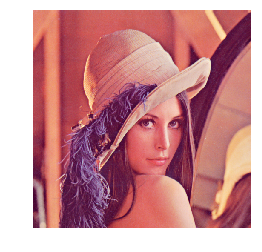

In [2]:
# https://en.wikipedia.org/wiki/Lenna

img = imageio.imread("./pict/Lenna.png") # plt.imread, PIL.Image.open и т.д. imwrite() - запись
print('shape: ', img.shape) # 512x512 пиксилей, 3 размерность - цвет
print('type: ', type(img))

plt.imshow(img) # RGB scale
plt.axis('off')
plt.show()

In [3]:
img # каждый пиксель расположен на цветовом кубе со сторонами - 255

Array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

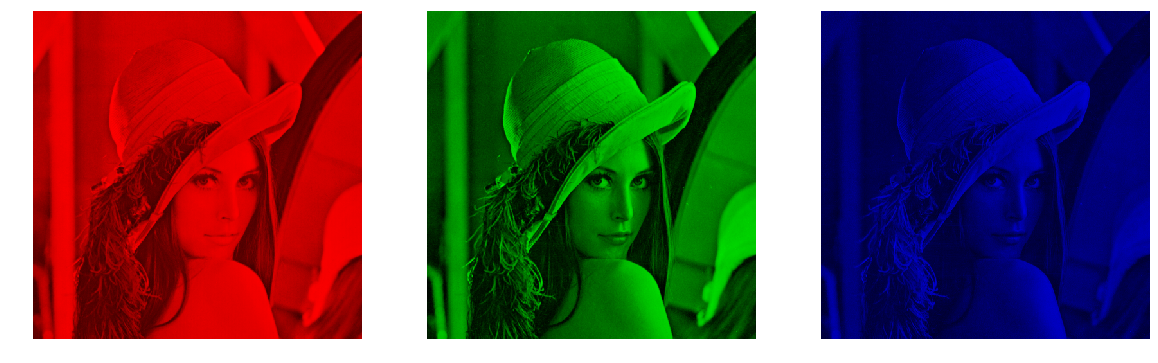

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

for c, ax in zip(range(3), axs):
    color_img = np.zeros_like(img)
    color_img[..., c] = img[..., c]
    ax.imshow(color_img)
    ax.set_axis_off()

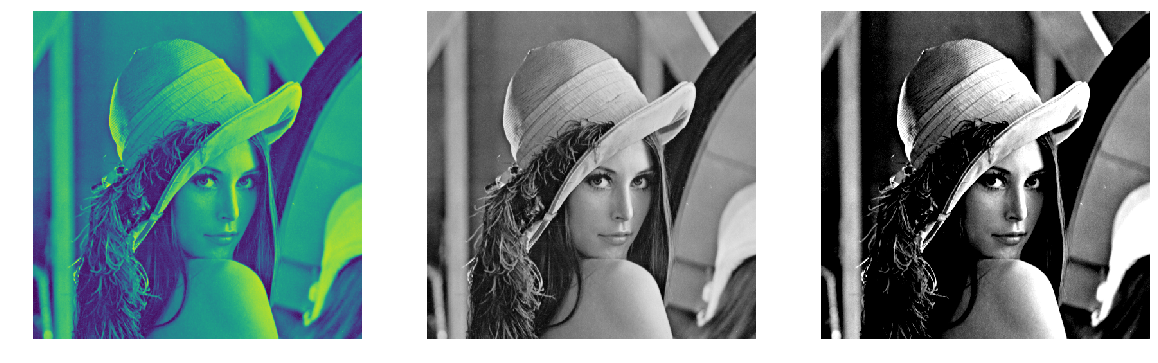

In [5]:
# grayscale = 0.2989 R + 0.5870 G + 0.1140 B - формула приведения

img_gray = np.dot(img, [0.2989, 0.5870, 0.1140])

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_gray) 
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap=plt.cm.gray) 
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_gray, cmap=plt.cm.gray, vmin=100, vmax=200) # контрастность
plt.axis('off')
plt.show()

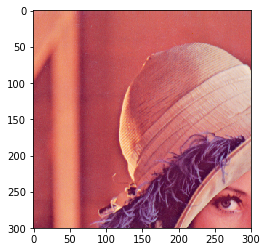

In [19]:
plt.imshow(img[:300, :300, :])

In [20]:
img.min(), img.mean(), img.max()

(3, 128.22837575276694, 255)

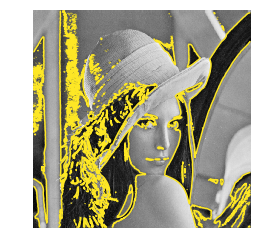

In [6]:
plt.imshow(img_gray,  cmap=plt.cm.gray)
plt.contour(img_gray, [0, 100]) # контуры
plt.axis('off')
plt.show()

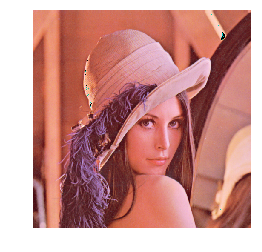

In [7]:
# https://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/
# вращение в пространстве цветов

from matplotlib.animation import FuncAnimation
from IPython import display
import warnings
warnings.filterwarnings("ignore")

def do_normalise(im):
    return -np.log(1 / ((1 + im) / 257) - 1)
 
def undo_normalise(im):
    return (1 + 1 / (np.exp(-im) + 1) * 257).astype("uint8")

def rotation_matrix(theta):
    """
    3D rotation matrix around the X-axis by angle theta
    """
    return np.c_[
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ]

for i in range(0, 100):
    im_normed = do_normalise(img)
    im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(i * np.pi/10))
    im2 = undo_normalise(im_rotated)
    
    plt.imshow(im2)
    plt.axis('off')
    plt.show()
    display.clear_output(wait=True)

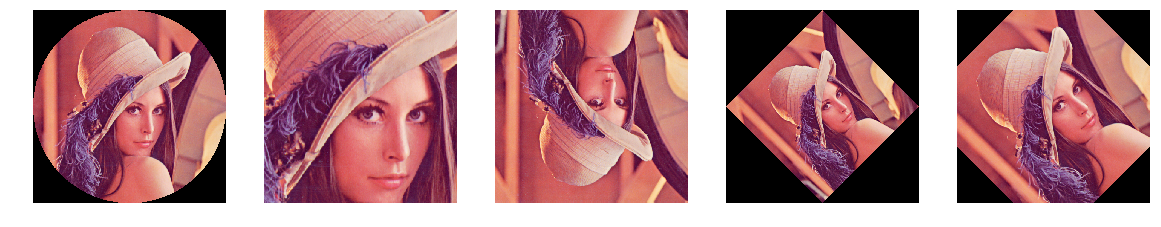

In [8]:
lx, ly, lz = img.shape

# Mask
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4 
img_circle = img.copy()
img_circle[mask] = 0 # обычная маска в numpy

# Cropping
crop_img = img[lx // 4: - lx // 4, ly // 4: - ly // 4] # обычный slice в numpy

# Flip
flip_img = np.flipud(img)

# Rotation
rotate_img = ndimage.rotate(img, 45)
rotate_img_noreshape = ndimage.rotate(img, 45, reshape=False)

plt.figure(figsize=(20, 10))
plt.subplot(1, 5, 1)
plt.imshow(img_circle)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(crop_img)
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(flip_img)
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(rotate_img)
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(rotate_img_noreshape)
plt.axis('off')

plt.show()

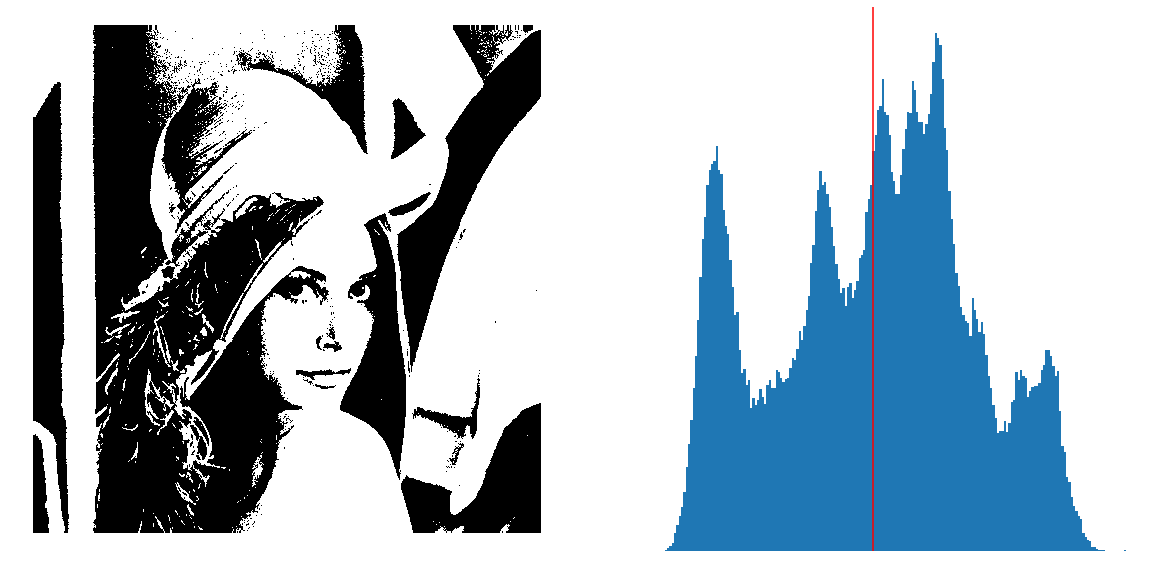

In [16]:
# сегментация

import time

for i in np.append(np.linspace(0, 2, 20), 1):
    plt.figure(figsize=(20,  10))
    plt.subplot(1, 2, 1)
    plt.imshow(((img_gray > i * img_gray.mean()) * 255).astype("uint8"), 
               cmap=plt.cm.gray) # пороговая сегментация
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.hist(np.array(img_gray).ravel(), bins=200)
    plt.axvline(x=i * img_gray.mean(), color='red')
    plt.axis('off')

    plt.show()
        
    display.clear_output(wait=True)
    time.sleep(0.5)

In [10]:
from skimage import filters

val = filters.threshold_otsu(img_gray) # основан на гистограмме
val

116.45463203125

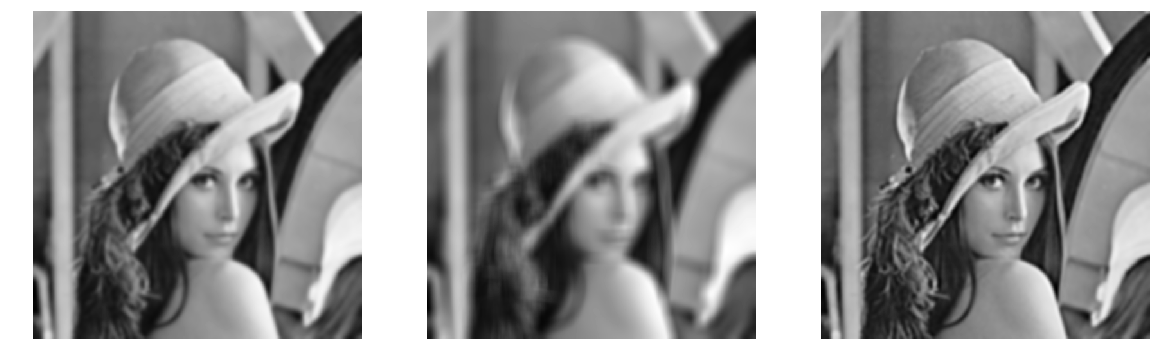

In [13]:
# фильтры - функция от окружения пикселя

gaussian_blurred = ndimage.gaussian_filter(img_gray, sigma=3) # размытие
local_mean_blurred = ndimage.uniform_filter(img_gray, size=20)

alpha = 10 # наведение резкости
filter_blurred = ndimage.gaussian_filter(gaussian_blurred, 1)
sharpened = gaussian_blurred + alpha * (gaussian_blurred - filter_blurred)  # придает больший вес контурам 

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(gaussian_blurred,  plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(local_mean_blurred,  plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened,  plt.cm.gray)
plt.axis('off')

plt.show()

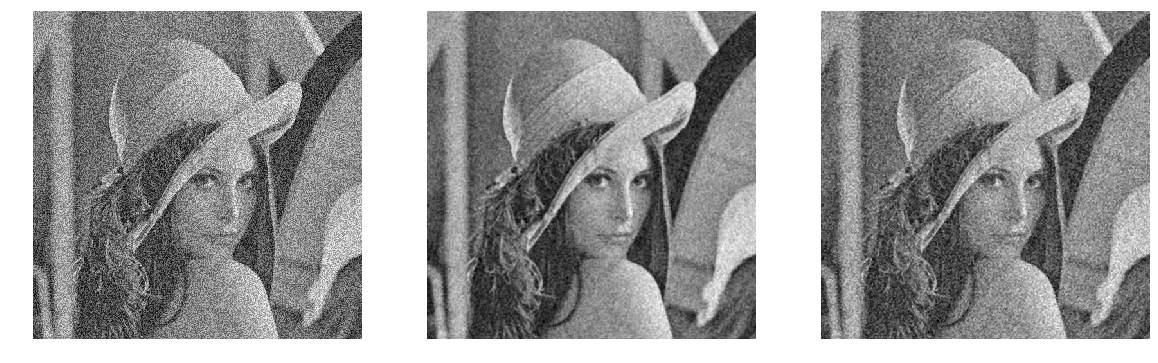

In [14]:
# денойзинг

noisy = img_gray + 3 * img_gray.std() * np.random.random(img_gray.shape)
gauss_denoised = ndimage.gaussian_filter(noisy, 1)
med_denoised = ndimage.median_filter(noisy, 3) # вроде как должно лучше с границами..

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(noisy,  plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gauss_denoised,  plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(med_denoised,  plt.cm.gray)
plt.axis('off')

plt.show()

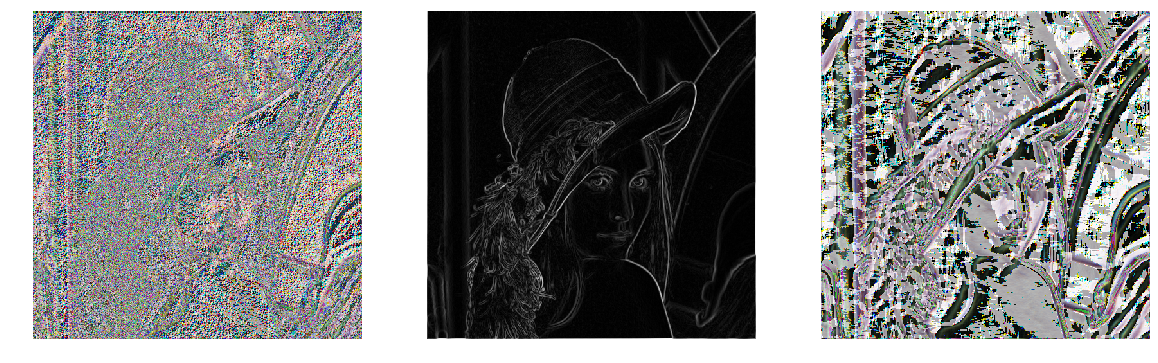

In [15]:
# edge detection 

def sobol_filter(img):     # фильтр Собель находит градиент по направлению по каждому цвету

    dx = ndimage.sobel(img, 0, mode='constant')
    dy = ndimage.sobel(img, 1, mode='constant')
    sobel = np.hypot(dx, dy)  
    sobel *= 255.0 / np.max(sobel)  
    sobel = sobel.astype(img.dtype)
    
    return sobel

sobel_img = sobol_filter(img)
sobel_gray = sobol_filter(img_gray)
med_img = ndimage.median_filter(img, 10)
sobel_median = sobol_filter(med_img) # комбинация фильтров

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(sobel_img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_gray, plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_median, plt.cm.gray)
plt.axis('off')

plt.show()

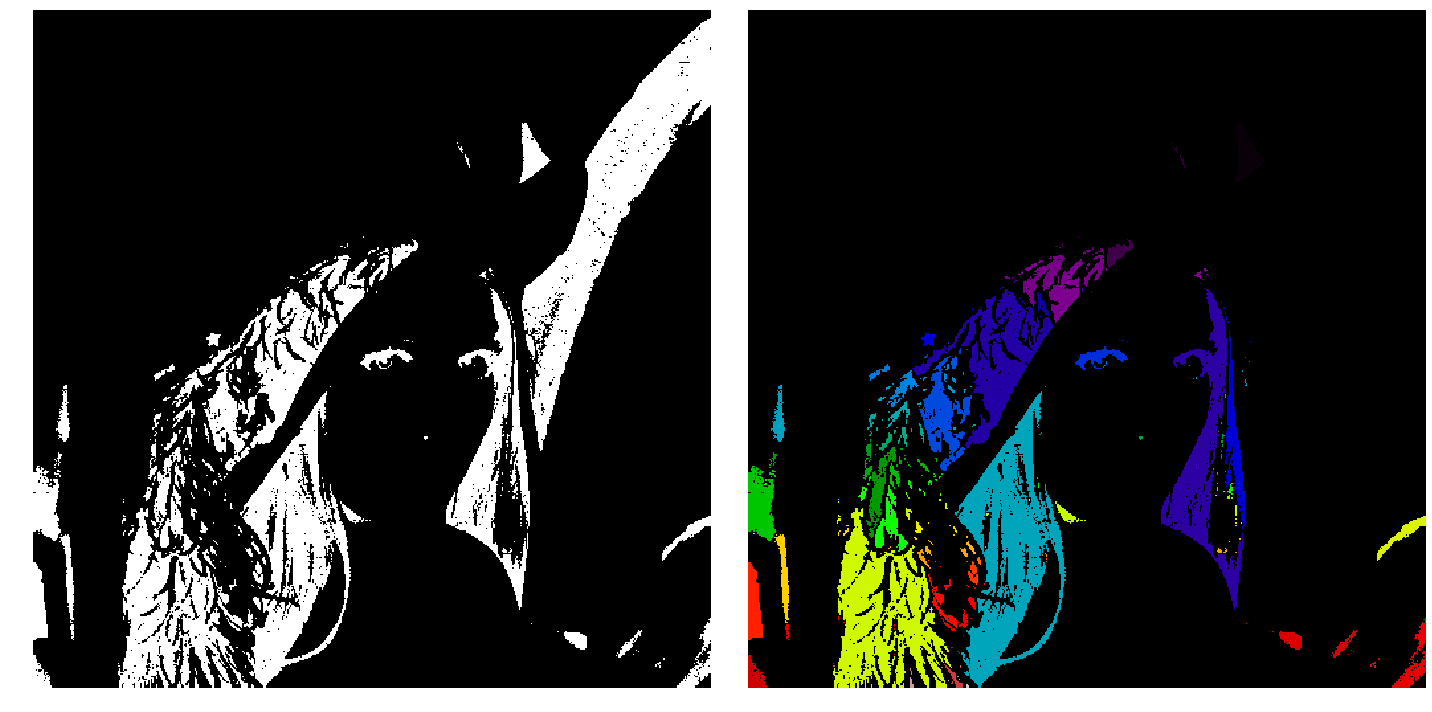

In [11]:
from skimage import measure

girl = img_gray < 0.5 * img_gray.mean()
labels = measure.label(girl, background=0)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(girl, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

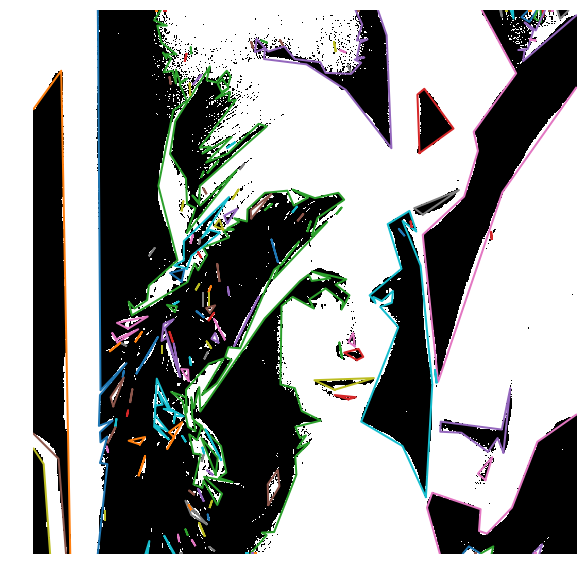

In [12]:
girl = img_gray > 1 * img_gray.mean()

contours = measure.find_contours(girl, 0.5, fully_connected="high")
simplified_contours = [measure.approximate_polygon(c, tolerance=5) for c in contours]

plt.figure(figsize=(20, 10))
plt.imshow(girl, plt.cm.gray)
for n, contour in enumerate(simplified_contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
plt.axis('off')
plt.show()